### MNIST Hand-Written Digit Recognition Using Tensorflow Compact Version

We assume that you read the `MNIST_numpy.ipynb` and `MNIST_tensorflow.ipynb` notebooks. In this notebook we implement more compact version of the neural network we already implemented twice in the mentioned notebooks. 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt  

In [2]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images 
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images 
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


#### Define the TF Graph

In [4]:
layer_in_size = 28 ** 2
layer_1_size = 64
layer_2_size = 32
layer_out_size = 10

In [5]:
x = tf.placeholder(shape = (None, layer_in_size), dtype = tf.float32)
y = tf.placeholder(shape = (None, layer_out_size), dtype = tf.float32)

layer_1 = tf.layers.dense(inputs = x, units = layer_1_size, activation = tf.nn.sigmoid)
layer_2 = tf.layers.dense(inputs = layer_1, units = layer_2_size, activation = tf.nn.sigmoid)   
logits = tf.layers.dense(inputs = layer_2, units = 10, activation = None)

y_hat = tf.nn.softmax(logits)

loss = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y)

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
step = optimizer.minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



#### Train the Network

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [8]:
batch_size = 32

for i in range(1000): 
    index = np.random.choice(train_data.shape[0], batch_size)
    x_ = train_data[index]
    y_ = np.zeros((batch_size, 10))
    y_[range(batch_size), train_labels[index]] = 1
    loss_eval, _ = sess.run([loss, step], feed_dict = {x : x_, y : y_})
    if i % 100 == 0: 
        print("Cross entropy ",loss_eval[0])    

Cross entropy  1.9832013
Cross entropy  1.3095952
Cross entropy  0.42774415
Cross entropy  0.98609054
Cross entropy  0.2873517
Cross entropy  1.4032049
Cross entropy  0.2730536
Cross entropy  0.010064331
Cross entropy  0.022081116
Cross entropy  0.1761655


#### Try How It Works

The predicted number is:  3


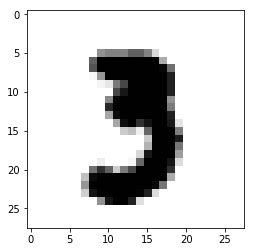

In [9]:
image_number = 93 # Number between 0 and 10 000 

x_ = np.expand_dims(eval_data[image_number], axis = 0)
pred_num = np.argmax(sess.run(y_hat, feed_dict = {x : x_}))
print("The predicted number is: ", pred_num)
plt.imshow(-x_.reshape((28,28)), cmap="gray")
plt.show()